Лабораторная работа 0

Тема: Игра в имитацию

Вариант 3

Номер зачётки: 105223430

1) Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Вывести значения частот появления значений 0, 1, 2 и 3. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.

$i = 4, j = 3, k = 10$

$p_0 = \frac{4}{34} = 0.11765$

$p_1 = \frac{13}{34} = 0.382353$

$p_2 = \frac{14}{34} = 0.411765$

$p_3 = \frac{3}{34} = 0.0882353$


In [ ]:
import random
import scipy

Quantity = 10000
I = 4
J = 3
K = 10
alpha = 0.05
df = 3  # число степеней свободы (4 категории - 1)
G = scipy.stats.chi2.ppf(1 - alpha, df)

def calculate_probabilities(i, j, k):
  p_sum = 2 * (i + j + k)
  p0 = i / p_sum
  p1 = (j + k) / p_sum
  p2 = (i + k) / p_sum
  p3 = j / p_sum

  return (p0, p1, p2, p3)

def generate_random_category(i, j, k):
  p0, p1, p2, p3 = calculate_probabilities(i, j, k)

  rand_value = random.random()

  if rand_value < p0:
    return 0
  elif rand_value < p0 + p1:
    return 1
  elif rand_value < p0 + p1 + p2:
    return 2

  return 3


p0, p1, p2, p3 = calculate_probabilities(I, J, K)
count = [0] * 4
exps = [Quantity * p0,
        Quantity * p1,
        Quantity * p2,
        Quantity * p3]

for random_variable in (generate_random_category(I, J, K) for _ in range(0, Quantity)):
  count[random_variable] += 1

K, p = scipy.stats.chisquare(f_obs=count, f_exp=exps)

print("K =", K, "p =", p)

if K > G:
  print(f"Гипотеза отвергается, K > G ({K} > {G})")
else:
  print(f"Гипотеза подтвердилась, K < G ({K} < {G})")

K = 0.9940800366300353 p = 0.8026844105310528
Гипотеза подтвердилась, K < G (0.9940800366300353 < 7.814727903251179)


2. Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Построив генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Разбить выборку на интервалы и построить гистограмму частот. Вывести средние арифметическое значений выборки и проверить  на уровне значимости 0,05 соответствие полученных данных показательному распределению с параметром λ. Здесь λ определяется номер по списку разделить на 4.

$\lambda = 0.75$

F: $y = 1- e ^ {-λx}$

$ln(1 - y) = ln(e ^ {-λx})$

$x = \frac{ln(1 - y)}{-λ}$

Математическое ожидание при таком распределении
должно быть
$M = \frac{1}{λ} = 1\frac{1}{3}$

$σ = \frac{1}{λ} = 1\frac{1}{3}$

Среднее арифметическое M = 1.3447379415082188
K = 21.711649515695505 p = 0.15274839149533875
Гипотеза подтвердилась, K < G (21.711649515695505 < 36.41502850180731)


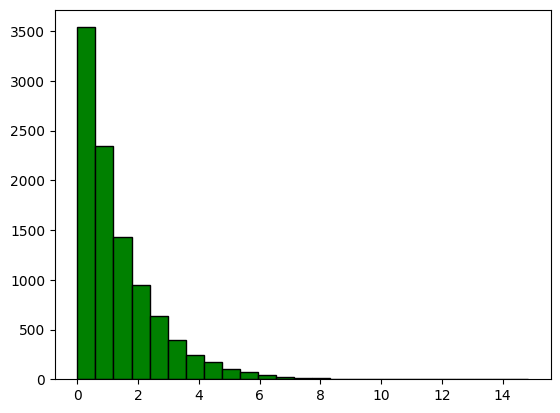

In [ ]:
from re import M
import random
import scipy
import math
import matplotlib.pyplot as plt

GROUPS = 25
Quantity = 10000
LAMBDA = 0.75
alpha = 0.05
G = scipy.stats.chi2.ppf(1 - alpha, GROUPS - 1)

M_current = 1 / LAMBDA
Sigma_current = 1 / LAMBDA

def LAMBDA_random():
  return math.log(1 - random.random()) / -LAMBDA

def F(x):
  if x > 0:
    return 1 - math.exp(-LAMBDA * x)
  return 0

value = [LAMBDA_random() for _ in range(0, Quantity)]
value.sort(reverse=True)

сenter = sum(value) / len(value)

print("Среднее арифметическое M =", сenter)

value_max = value[0]
value_min = 0

emps = [0] * GROUPS
exps = [0] * GROUPS
emps_new = []
exps_new = []

for val in value:
  freq_index = int(val * (GROUPS / value_max))
  if freq_index < GROUPS:
    emps[freq_index] += 1

for i in range(0, GROUPS):
  lower = i * (value_max / GROUPS)
  upper = (i + 1) * (value_max / GROUPS)

  probability = F(upper) - F(lower)

  exps[i] = int(probability * Quantity)

  if (exps[i] != 0):
    emps_new.append(emps[i])
    exps_new.append(exps[i])

exps_new[0] += sum(emps_new) - sum(exps_new)

K, p = scipy.stats.chisquare(f_obs=emps_new, f_exp=exps_new, ddof=2)

print("K =", K, "p =", p)

if K > G:
  print(f"Гипотеза отвергается, K > G ({K} > {G})")
else:
  print(f"Гипотеза подтвердилась, K < G ({K} < {G})")

plt.hist(value, color = 'green', edgecolor = 'black',
         bins = int(GROUPS))
plt.show()